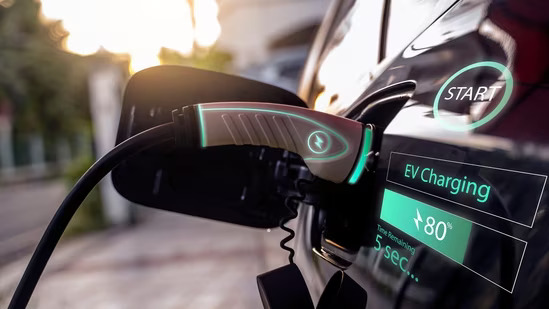

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# UNDERSTANDING MY DATASET 

In [4]:
data = pd.read_csv('Electric_cars_dataset.csv')

In [5]:
data.head(3)

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [7]:
data.shape

(64353, 18)

In [8]:
data.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,64347.000000,64346.000000,64353.000000,64353.000000,64184.000000,6.435300e+04
mean,98143.452888,2018.186212,106.948985,2524.990754,29.951904,1.972905e+08
std,2856.064329,2.726742,104.093919,12402.895104,14.661124,1.069466e+08
min,745.000000,1993.000000,0.000000,0.000000,0.000000,4.385000e+03
25%,98052.000000,2017.000000,14.000000,0.000000,19.000000,1.372865e+08
50%,98121.000000,2018.000000,73.000000,0.000000,34.000000,1.753776e+08
75%,98370.000000,2021.000000,215.000000,0.000000,43.000000,2.299039e+08
max,99701.000000,2022.000000,337.000000,845000.000000,49.000000,4.789346e+08


In [9]:
data.columns

Index(['ID', 'VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', 'Expected Price ($1k)'],
      dtype='object')

# Data cleaning

In [11]:
data.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [12]:
data.columns


Index(['ID', 'VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', 'Expected Price ($1k)'],
      dtype='object')

In [13]:
# the null values in the country,state,zipcode, columns are dropeed 
# model year fill with mode
# fill with forward fill electric utility
# vehicle location forward fill
# legislative district forward fill
# Model,makemodel year drop

In [14]:
# Dealing with imputations 
droped_rows_from = ['County', 'City', 'State', 'ZIP Code', 'Model Year','Model','Make',"VIN (1-10)",'ID']
data = data.dropna(subset=droped_rows_from)

In [15]:
data["Legislative District"] # Legislative District - 
# The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.

0        32.0
1        40.0
2        27.0
3        45.0
4        25.0
         ... 
64348    37.0
64349    27.0
64350    36.0
64351    46.0
64352    20.0
Name: Legislative District, Length: 64299, dtype: float64

In [16]:
droping_some = ['Legislative District','County','City','State','Vehicle Location','Electric Utility',"VIN (1-10)",'ID'] 

In [17]:
data1 = data.drop(columns=droping_some)
data1.columns

Index(['ZIP Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'DOL Vehicle ID', 'Expected Price ($1k)'],
      dtype='object')

In [18]:
data1.dropna(inplace=True)

In [19]:
data1.isnull().sum()

ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
DOL Vehicle ID                                       0
Expected Price ($1k)                                 0
dtype: int64

In [20]:
data1["Expected Price ($1k)"] =  data1["Expected Price ($1k)"].astype(float)

# EDA 

In [22]:
data1.Make.value_counts()

Make
TESLA                   27892
NISSAN                   8672
CHEVROLET                6648
FORD                     3832
KIA                      3062
BMW                      2706
TOYOTA                   2698
AUDI                     1264
VOLKSWAGEN               1217
CHRYSLER                 1091
HYUNDAI                   893
VOLVO                     687
FIAT                      560
HONDA                     528
PORSCHE                   455
JEEP                      435
MITSUBISHI                376
MINI                      303
MERCEDES-BENZ             248
SMART                     192
POLESTAR                  164
JAGUAR                    142
CADILLAC                   69
LINCOLN                    59
SUBARU                     34
LAND ROVER                 26
RIVIAN                     26
FISKER                     11
AZURE DYNAMICS              3
LUCID MOTORS                2
TH!NK                       1
DODGE                       1
WHEEGO ELECTRIC CARS        1
BENTL

In [23]:
past_year = data1['Model Year'].min()
past_year

1993.0

In [24]:
present_year = data1['Model Year'].max()
present_year

2022.0

In [25]:
time_difference = present_year-past_year
time_difference

29.0

In [26]:
# # year and the price plots 
# price = data1["Expected Price ($1k)"]
# year = data1["Model Year"]
# plt.plot(year,price)

In [27]:
# x = data1.Make
# y = data1["Model Year"]
# plt.plot(x,y)

# model building 

In [29]:
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA

In [30]:
X= data1.drop(columns=["Expected Price ($1k)","DOL Vehicle ID"])
y = data1["Expected Price ($1k)"]

In [43]:
len(X.columns)

8

In [32]:
encode = X.select_dtypes(include="object").columns

In [33]:
# perform encoding on the values of trhose columns
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
X[encode]=le.fit_transform(encode)

In [34]:
X.head(5)

,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,98037.0,2020.0,2,3,1,0,308,0
1,98229.0,2011.0,2,3,1,0,73,0
2,98422.0,2015.0,2,3,1,0,81,0
3,98053.0,2013.0,2,3,1,0,38,0
4,98375.0,2019.0,2,3,1,0,238,0


In [45]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.33,random_state=42)

In [50]:
model = SVR()
model.fit(X_train,y_train)

SVR()

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [65]:
ypred = model.predict(X_test)

In [53]:
mse = mean_absolute_error(y_true=y_test,y_pred=ypred)
mse

19.449482552348705

In [54]:
r_score = r2_score(y_true=y_test,y_pred=ypred)
r_score

0.06200259619006354